In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customers = pd.read_csv('/content/drive/MyDrive/colab/Mall_Customers.csv')

In [4]:
customers.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customers.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
customers['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
customers['Annual_Income_(k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [9]:
customers['Spending_Score'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [10]:
customers['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [11]:
customers.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
df = customers.copy()

In [51]:
df.rename(columns={
    'Annual_Income_(k$)':'income',
    'Spending_Score':'score'
}, inplace=True)

In [52]:
df.drop('CustomerID', axis=1, inplace=True)

In [15]:
df.head()

,Genre,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
genres = pd.get_dummies(df['Genre'])

In [17]:
df = pd.concat([df, genres], axis=1)

In [18]:
df.drop('Genre', axis=1, inplace=True)

In [19]:
df

,Age,income,score,Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [20]:
std = StandardScaler()
mmax = MinMaxScaler()

In [21]:
df_std = std.fit_transform(df)
df_mmax = mmax.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)
df_mmax = pd.DataFrame(df_mmax, columns=df.columns)

In [22]:
df_std.head()

,Age,income,score,Female,Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


In [23]:
df_mmax.head()

,Age,income,score,Female,Male
0,0.019231,0.000000,0.387755,0.0,1.0
1,0.057692,0.000000,0.816327,0.0,1.0
2,0.038462,0.008197,0.051020,1.0,0.0
3,0.096154,0.008197,0.775510,1.0,0.0
4,0.250000,0.016393,0.397959,1.0,0.0


In [24]:
df.head()

,Age,income,score,Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [25]:
errors = []
for i in range(2,12):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_std)
  errors.append(kmeans.inertia_)

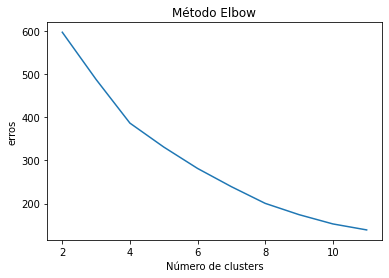

In [26]:
plt.plot(range(2,12), errors)
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('erros')
plt.show()

In [27]:
from yellowbrick.cluster import KElbowVisualizer

### Standard Scaler

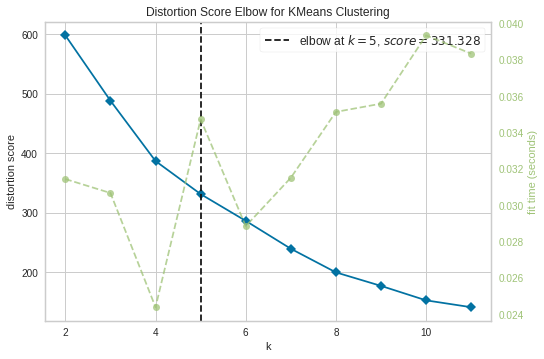

In [28]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(2,12))
yellow_visualizer.fit(df_std)
yellow_visualizer.show()

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer

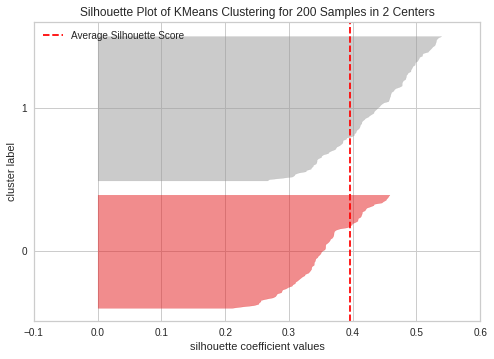

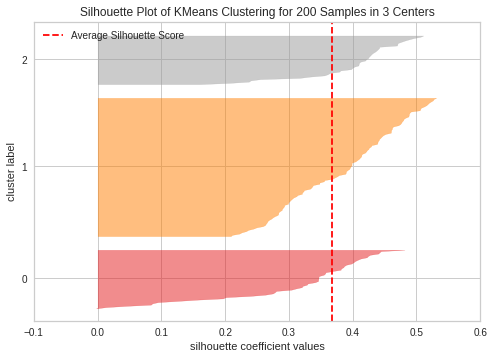

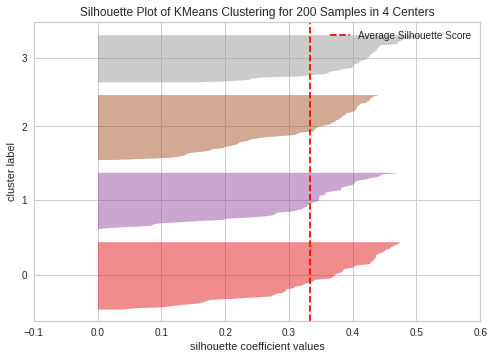

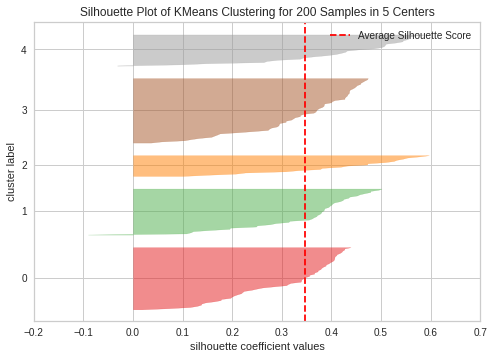

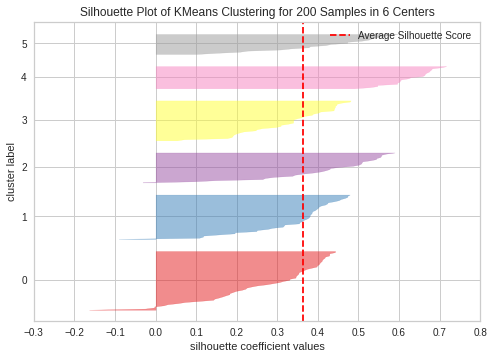

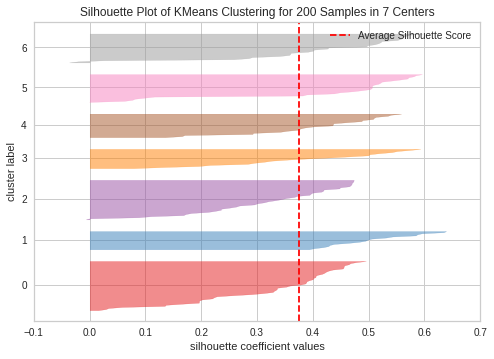

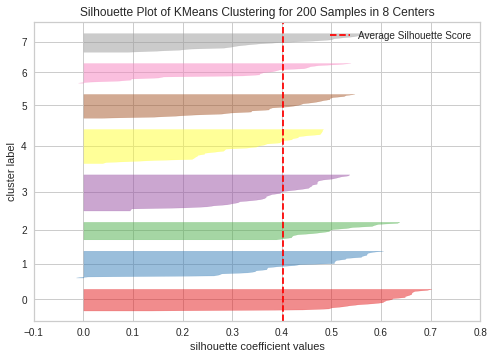

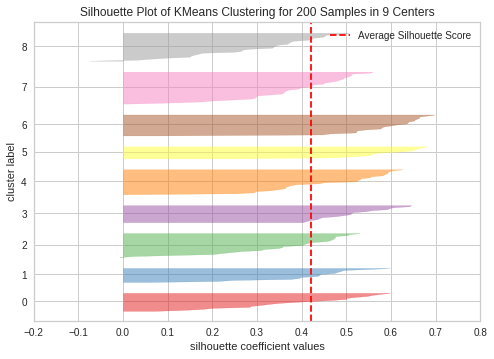

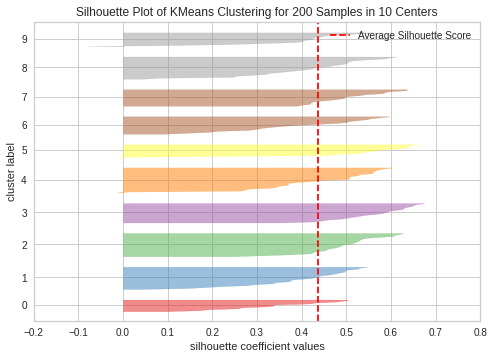

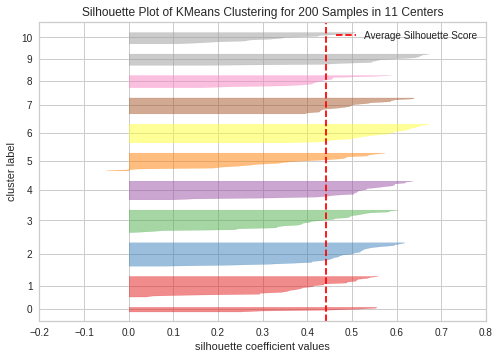

In [30]:
for i in range(2,12):
  kmeans = KMeans(n_clusters=i)
  yellow_visualizer = SilhouetteVisualizer(kmeans)
  yellow_visualizer.fit(df_std)
  yellow_visualizer.show()

### MinMax Scaler

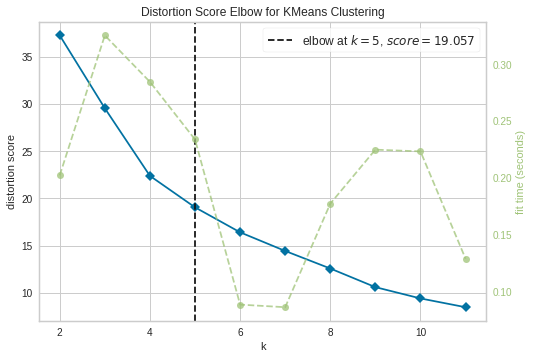

In [31]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(2,12))
yellow_visualizer.fit(df_mmax)
yellow_visualizer.show()

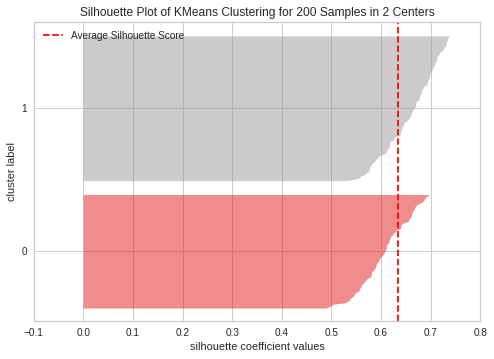

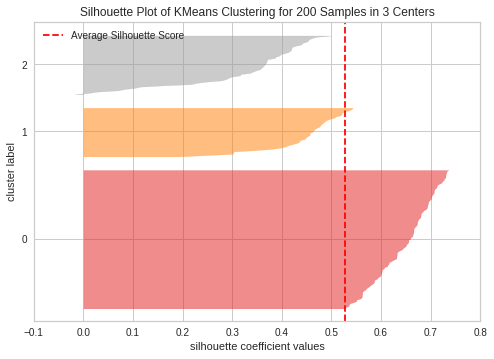

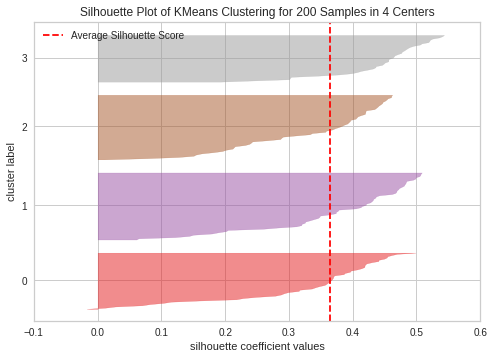

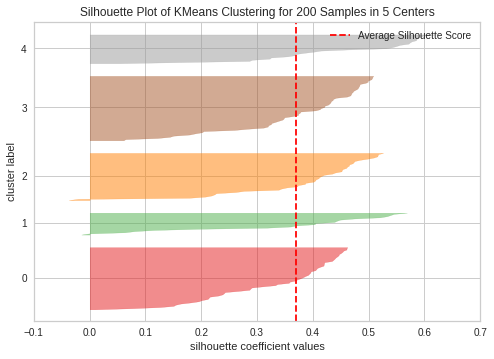

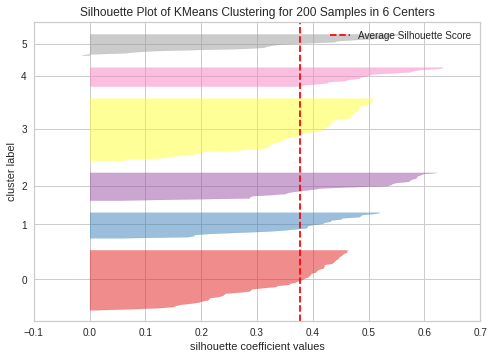

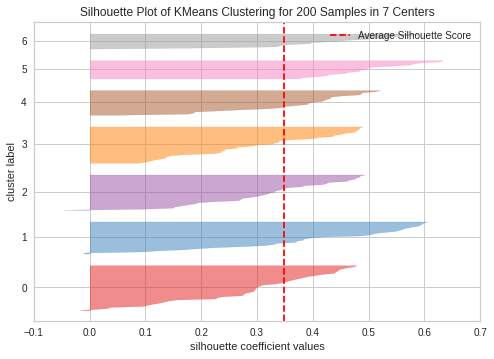

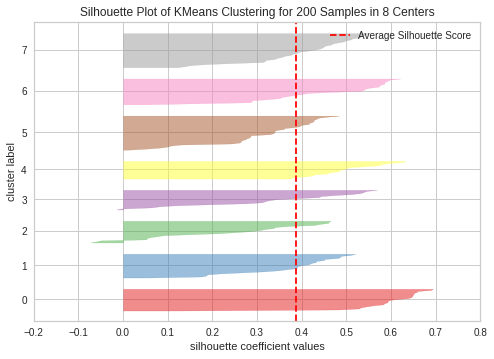

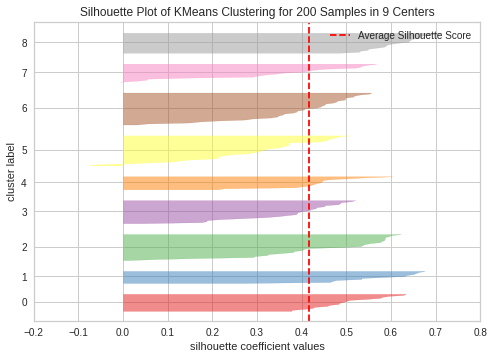

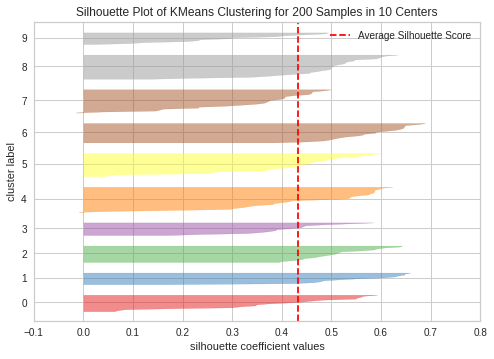

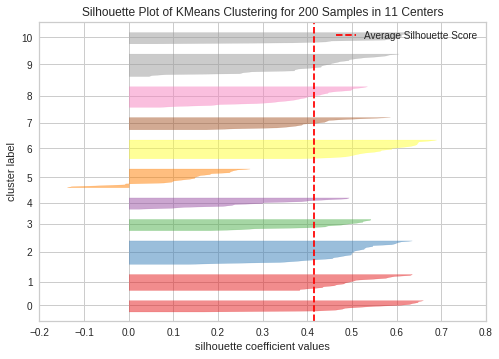

In [32]:
for i in range(2,12):
  kmeans = KMeans(n_clusters=i)
  yellow_visualizer = SilhouetteVisualizer(kmeans)
  yellow_visualizer.fit(df_mmax)
  yellow_visualizer.show()

### KMeans

In [33]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_std)

In [36]:
df['cluster'] = clusters

In [37]:
df.head()

,Age,income,score,Female,Male,cluster
0,19,15,39,0,1,3
1,21,15,81,0,1,3
2,20,16,6,1,0,1
3,23,16,77,1,0,0
4,31,17,40,1,0,0


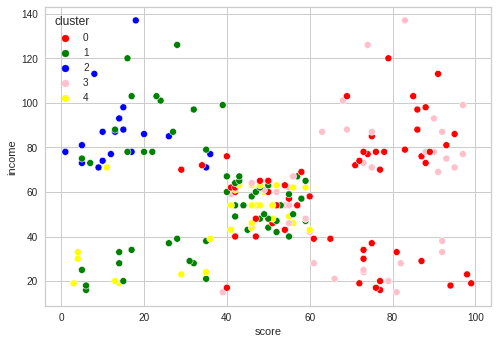

In [43]:
sns.scatterplot(data=df, x='score', y='income', hue='cluster', palette=['red', 'green', 'blue', 'pink', 'yellow'])
plt.show()

In [44]:
import plotly.express as px

In [46]:
fig = px.scatter_3d(df, x='score', y='income', z='Female', color='cluster')
fig.show()

### Sem genero

In [56]:
df_sg = df.drop('Genre', axis=1)
df_sg.head()

,Age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [57]:
df_sg_std = std.fit_transform(df_sg)
df_sg_std = pd.DataFrame(df_sg_std, columns=df_sg.columns)

In [102]:
df_sg_mmax = mmax.fit_transform(df_sg)
df_sg_mmax = pd.DataFrame(df_sg_mmax, columns=df_sg.columns)

In [59]:
df_sg_std

,Age,income,score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [104]:
df_sg_mmax.head()

,Age,income,score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


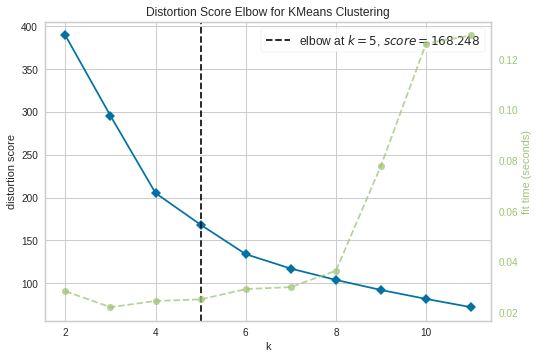

In [60]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(2,12))
yellow_visualizer.fit(df_sg_std)
yellow_visualizer.show()

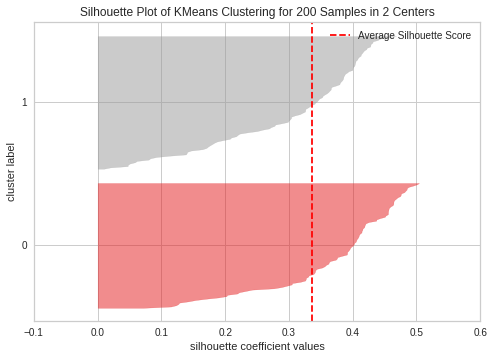

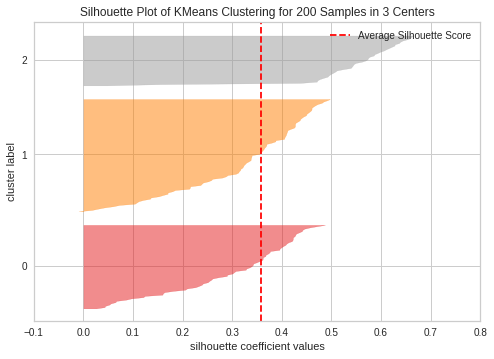

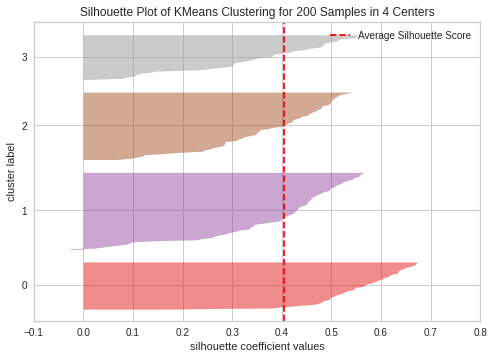

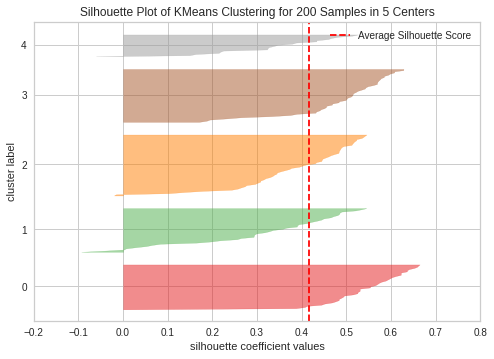

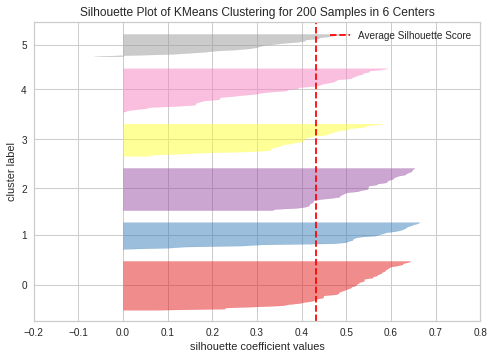

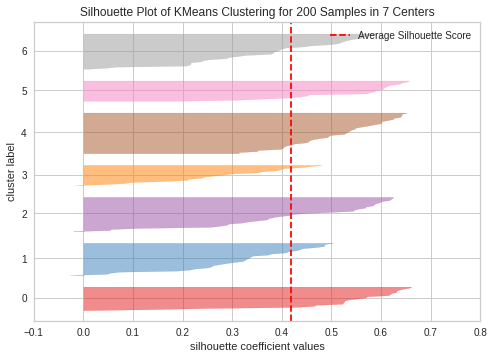

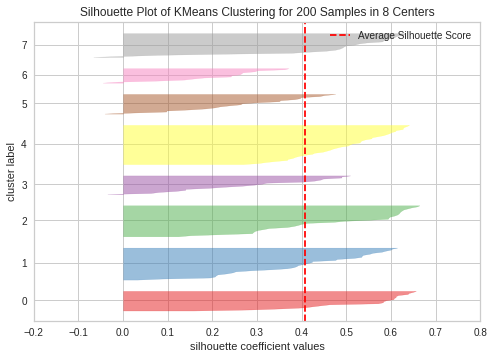

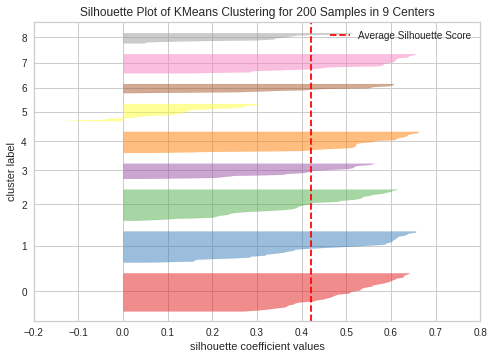

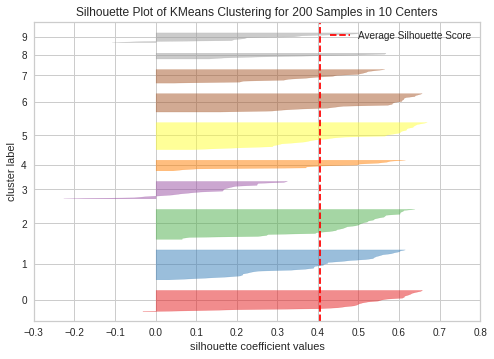

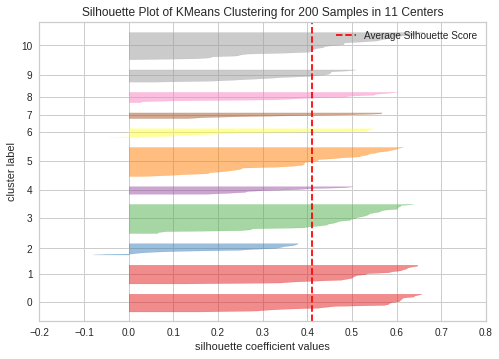

In [61]:
for i in range(2,12):
  kmeans = KMeans(n_clusters=i)
  yellow_visualizer = SilhouetteVisualizer(kmeans)
  yellow_visualizer.fit(df_sg_std)
  yellow_visualizer.show()

In [95]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_sg_std)

In [96]:
df['cluster'] = clusters
#palette=['red', 'green', 'blue', 'pink', 'yellow']

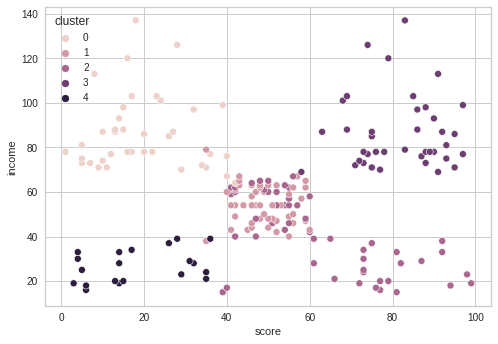

In [101]:
sns.scatterplot(data=df, x='score', y='income', hue='cluster')
plt.show()

In [98]:
fig = px.scatter_3d(df, x='score', y='income', z='Age', color='cluster')
fig.show()

In [100]:
df.groupby('cluster').median()

,Age,income,score
cluster,,,
0,41.0,78.0,17.0
1,54.0,54.0,48.0
2,24.0,40.0,58.0
3,32.0,78.5,83.0
4,47.0,26.5,14.5


### Utilizando MinMax

In [105]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_sg_mmax)

In [106]:
df['cluster_mmax'] = clusters


In [107]:
df

,Genre,Age,income,score,cluster,cluster_mmax
0,Male,19,15,39,2,2
1,Male,21,15,81,2,3
2,Female,20,16,6,4,2
3,Female,23,16,77,2,3
4,Female,31,17,40,2,2
...,...,...,...,...,...,...
195,Female,35,120,79,3,1
196,Female,45,126,28,0,4
197,Male,32,126,74,3,1
198,Male,32,137,18,0,4


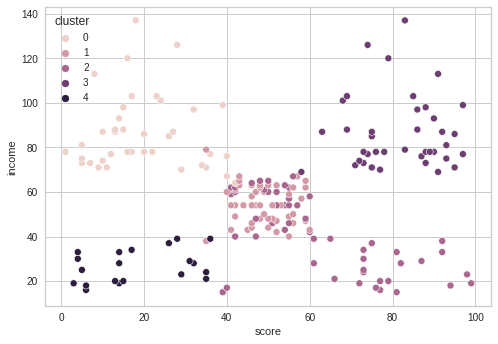

In [108]:
sns.scatterplot(data=df, x='score', y='income', hue='cluster')
plt.show()

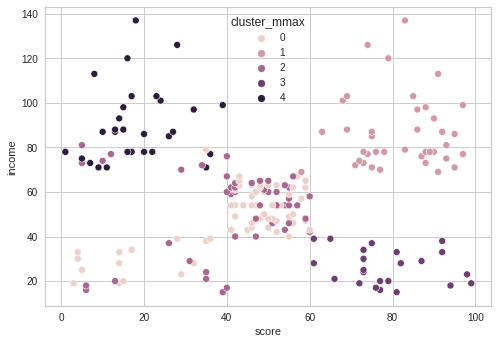

In [109]:
sns.scatterplot(data=df, x='score', y='income', hue='cluster_mmax')
plt.show()

In [110]:
fig = px.scatter_3d(df, x='score', y='income', z='Age', color='cluster')
fig.show()

In [111]:
fig = px.scatter_3d(df, x='score', y='income', z='Age', color='cluster_mmax')
fig.show()

In [112]:
df.groupby('cluster').median()

,Age,income,score,cluster_mmax
cluster,,,,
0,41.0,78.0,17.0,4.0
1,54.0,54.0,48.0,0.0
2,24.0,40.0,58.0,2.0
3,32.0,78.5,83.0,1.0
4,47.0,26.5,14.5,0.0


In [114]:
df.drop('cluster', axis=1).groupby('cluster_mmax').median()

,Age,income,score
cluster_mmax,,,
0,53.5,49.0,46.0
1,32.0,78.5,83.0
2,26.0,57.0,42.0
3,24.0,25.0,77.0
4,43.5,87.0,16.5
